In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

input = 'http://media.sundog-soft.com/SelfDriving/PastHires.csv'
df = pd.read_csv(input,header = 0)

In [2]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [3]:
d = {'Y':1,'N':0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS':0,'MS':1,'PhD':2}
df['Level of Education'] = df['Level of Education'].map(d)

In [4]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [5]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [6]:
y = df['Hired']
x = df[features]

clf = tree.DecisionTreeClassifier()

clf.fit(x,y)

DecisionTreeClassifier()

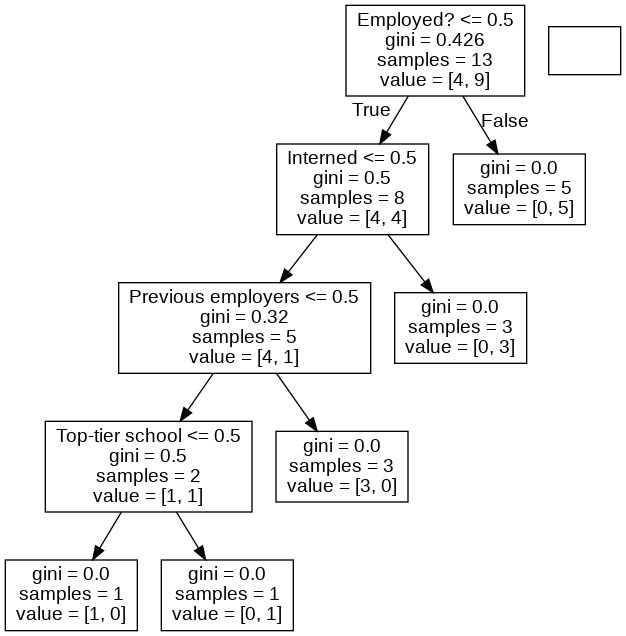

In [8]:
from IPython.display import Image
import six
import pydotplus

dot_data = six.StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [12]:
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

clf = RandomForestClassifier(n_estimators=10)
clf.fit(x,y)

print("Person A = ",clf.predict([[10,1,4,0,0,0]]))

print("Person B = ",clf.predict([[0,0.2,0,0,1,0]]))

Person A =  [1]
Person B =  [0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
